In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
import gc

import uncertainties
from uncertainties import unumpy
import os
from pathlib import Path
import pandas

import importlib
import sys
sys.path.append(r"C:\Users\anant\Documents\GitHub\FermiHubbardShare")
import methods.Lanczos_ensemble_average as LEA

In [5]:
importlib.reload(LEA)
from methods.Lanczos_ensemble_average import *

In [10]:
data_dir = os.path.join('ED_data','Square_9_(3,0)_(0,3)_OBC', 'U-4')
U=-4
N_sites = 9

In [11]:
import tqdm

In [12]:
filename = "Nup_4_Ndown_1_T_list.txt"
full_path = os.path.join(data_dir, filename)
T_list = np.loadtxt(full_path)
print(T_list)

[5.00000000e-02 1.00000000e-01 1.50000000e-01 2.00000000e-01
 2.50000000e-01 3.00000000e-01 3.50000000e-01 4.00000000e-01
 4.50000000e-01 5.00000000e-01 5.50000000e-01 6.00000000e-01
 6.50000000e-01 7.00000000e-01 7.50000000e-01 8.00000000e-01
 8.50000000e-01 9.00000000e-01 9.50000000e-01 1.00000000e+00
 1.05000000e+00 1.49253731e+00 1.65562914e+00 1.85873606e+00
 2.11864407e+00 2.46305419e+00 2.94117647e+00 3.64963504e+00
 4.80769231e+00 7.04225352e+00 1.31578947e+01 1.00000000e+02]


In [13]:
emin_dict = {}
for filename in os.listdir(data_dir):
    if filename.endswith("emin.txt"):
        pars = filename.split('_')[1::2]
        N_up,N_down = int(pars[0]),int(pars[1])
        full_path = os.path.join(data_dir, filename)
        with open(full_path,'r') as f:
            emin = float(f.readline().strip())
        emin_dict[(N_up,N_down)] = emin
print(emin_dict)

{(4, 1): -11.11092982532009}


In [14]:
thermo_dict = {'Z': {},'E': {}, 'F':{},'S':{}}
for filename in os.listdir(data_dir):
    ends_str = "thermo_values.npz"
    if filename.endswith(ends_str):
        pars = filename.split('_')[1::2]
        N_up,N_down = int(pars[0]),int(pars[1])
        full_path = os.path.join(data_dir, filename)
        vals = {}
        errs = {}
        with np.load(full_path) as dfile:
            for key in thermo_dict.keys():
                vals[key] = dfile[key]
        full_path = os.path.join(data_dir, filename[:-len(ends_str)]+"thermo_errors.npz")
        with np.load(full_path) as dfile:
            for key in thermo_dict.keys():
                errs[key] = dfile[key]
        for key in thermo_dict.keys():
            thermo_dict[key][(N_up,N_down)] = unumpy.uarray(vals[key],errs[key])


In [15]:
filename = "Nup_4_Ndown_1_quantities_list.txt"
quantitites = []
full_path = os.path.join(data_dir, filename)
with open(full_path,'r') as f:
    quantitites = [s.strip() for s in  f.readlines()]
quantitites.append('Energy')
for ki, key in enumerate(quantitites):
    print(ki, key)

0 create_SxSx_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
1 create_SzSz_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
2 create_doublon_func()
3 create_nn_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
4 create_pp_func([(0, 1), (0, 2), (0, 3), (0, 6)

In [16]:
# Output csvs for canonical ensemble data
# qnames = ['nn(1.4)', 'nn(2.2)', 'nn(2)', 'SxSx(1)', 'SxSx(1.4)', 'SxSx(2.2)', 'SxSx(2)', 'SzSz(1)', 'SzSz(1.4)', 'SzSz(2.2)', 'SzSz(2)', 'Doublon', 'Energy']
qnames = ['SxSx(1)', 'SzSz(1)', 'Doublon', 'nn(1)', 'pp(1)', 'Singles', 'Energy']
for ki, key in enumerate(quantitites):
    print(ki, qnames[ki], key)

0 SxSx(1) create_SxSx_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
1 SzSz(1) create_SzSz_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
2 Doublon create_doublon_func()
3 nn(1) create_nn_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)
4 pp(1) create_pp_

In [17]:
thermal_avg_q = [{} for i in range(len(quantitites))]
for filename in os.listdir(data_dir):
    ends_str = "values.npy"
    if filename.endswith(ends_str):
        pars = filename.split('_')[1::2]
        N_up,N_down = int(pars[0]),int(pars[1])
        full_path = os.path.join(data_dir, filename)
        vals = []
        errs = []
        with open(full_path,'rb') as f:
            for i in range(len(quantitites)):
                vals.append(np.load(f, allow_pickle=True))
        full_path = os.path.join(data_dir, filename[:-len(ends_str)]+"errors.npy")
        with open(full_path,'rb') as f:
            for i in range(len(quantitites)):
                errs.append(np.load(f, allow_pickle=True))
        for i in range(len(quantitites)):
            thermal_avg_q[i][(N_up,N_down)] = unumpy.uarray(vals[i],errs[i])


In [18]:
emin_dict[(0,0)] = 0.0
temp = np.zeros(len(quantitites))
# temp[[5,7]]=1
for i in range(len(quantitites)):
    thermal_avg_q[i][(0,0)] = unumpy.uarray(temp[i]*np.ones(len(T_list)),np.zeros(len(T_list)))

thermo_dict['Z'][(0,0)] = unumpy.uarray(np.ones(len(T_list)),np.zeros(len(T_list)))
thermo_dict['E'][(0,0)] = unumpy.uarray(np.zeros(len(T_list)),np.zeros(len(T_list)))
thermo_dict['F'][(0,0)] = unumpy.uarray(np.zeros(len(T_list)),np.zeros(len(T_list)))
thermo_dict['S'][(0,0)] = unumpy.uarray(np.zeros(len(T_list)),np.zeros(len(T_list)))


In [19]:
from matplotlib.patches import RegularPolygon, Rectangle
import matplotlib.colors
from matplotlib.cm import ScalarMappable


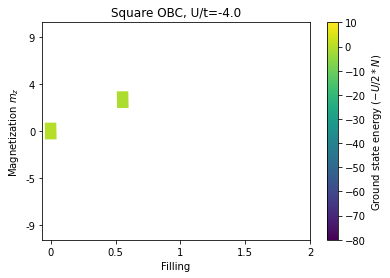

In [20]:
cmap = plt.get_cmap('viridis')
myNorm = matplotlib.colors.Normalize(vmin=-80, vmax=10)
fig,ax = plt.subplots(facecolor='white')
e_lists = [[] for i in range(2*N_sites+1)]
m_lists = [[] for i in range(2*N_sites+1)]
for (nu, nd) in emin_dict.keys():
    xy = (5*(nu+nd)-2, 5*(nu-nd)-4)
    # print(xy)
    val = emin_dict[(nu,nd)]-U/2*(nu+nd)
    e_lists[(nu+nd)].append(val)
    m_lists[(nu+nd)].append(nu-nd)
    # val = emax_dict[o_i][(nu,nd)]-U/2*(nu+nd)
    # rect = RegularPolygon(xy, 4, 4, np.pi/4, fc=cmap(myNorm(val)))
    rect = Rectangle(xy, 4, 8, angle=np.pi/4, fc=cmap(myNorm(val)))
    ax.add_patch(rect)
plt.xlim(-3, 5*N_sites+3)
plt.ylim(-5*N_sites-7,5*N_sites+4+3)
plt.title(f'Square OBC, U/t={U:.1f}')
plt.xlabel('Filling')
plt.xticks(np.linspace(0, N_sites*10, 5), [0, 0.5, 1, 1.5, 2])
plt.yticks(np.linspace(-N_sites*5, N_sites*5, 5), [-N_sites, -N_sites//2, 0, N_sites//2, N_sites])
plt.ylabel('Magnetization $m_z$')
plt.colorbar(ScalarMappable(myNorm, cmap=cmap), ax=plt.gca(), label='Ground state energy ($-U/2*N$)')

ValueError: zero-size array to reduction operation minimum which has no identity

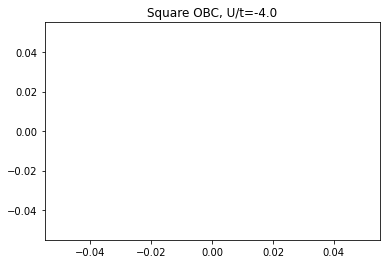

In [21]:
plt.figure(facecolor='white')
plt.title(f'Square OBC, U/t={U:.1f}')
cmap = plt.get_cmap('rainbow')
for i in range(N_sites+1):
    idx = np.argsort(m_lists[i])
    if i==N_sites:
        plt.plot(np.array(m_lists[i])[idx], np.array(e_lists[i])[idx]-np.min(e_lists[i]), label=i, color=cmap(i/(N_sites+1)), marker='.')
    else:
        plt.plot(np.array(m_lists[i])[idx], np.array(e_lists[i])[idx]-np.min(e_lists[i]), label=i, color=cmap(i/(N_sites+1)))
plt.ylabel('$E_{G.S.}$(sector) - min[$E_{G.S.}$(sector)]')
plt.xlabel('Magnetization')
plt.legend(loc=2, bbox_to_anchor=(1,1), title='filling', ncol=2)
plt.show()


In [22]:
# Sz <--> -Sz
# up <--> down
N_list = list(emin_dict.keys())
print(N_list)
thermo_keys = list(thermo_dict.keys())
for (nu,nd) in N_list:
    if nu==nd: continue        
    lst = list(range(len(quantitites)))
    for i in lst:
        thermal_avg_q[i][(nd,nu)] = thermal_avg_q[i][(nu,nd)]
    for key in thermo_keys:
        thermo_dict[key][(nd,nu)] = thermo_dict[key][(nu,nd)] 
    emin_dict[(nd,nu)] = emin_dict[(nu,nd)]


[(4, 1), (0, 0)]


In [23]:
print(len(N_list))

2


In [24]:
print(len(emin_dict.keys()))

3


In [25]:
for ki, key in enumerate(quantitites):
    print(ki, qnames[ki])

0 SxSx(1)
1 SzSz(1)
2 Doublon
3 nn(1)
4 pp(1)
5 Singles
6 Energy


In [27]:
quantitites[0]

'create_SxSx_func([(0, 1), (0, 2), (0, 3), (0, 6), (1, 2), (1, 0), (1, 4), (1, 7), (2, 0), (2, 1), (2, 5), (2, 8), (3, 4), (3, 5), (3, 6), (3, 0), (4, 5), (4, 3), (4, 7), (4, 1), (5, 3), (5, 4), (5, 8), (5, 2), (6, 7), (6, 8), (6, 0), (6, 3), (7, 8), (7, 6), (7, 1), (7, 4), (8, 6), (8, 7), (8, 2), (8, 5)],)'

In [20]:
# n <--> 2-n
N_list2 = list(emin_dict.keys())
thermo_keys = list(thermo_dict.keys())
lst = list(range(len(quantitites)))
lst.remove(11)
for (nu,nd) in N_list2:
    if nu+nd==N_sites: continue
    # d <--> h
    # h = 1+d-n
    thermal_avg_q[11][(N_sites-nu,N_sites-nd)] = 1+thermal_avg_q[11][(nu,nd)]-(nu+nd)/N_sites  
    for i in lst:
        thermal_avg_q[i][(N_sites-nu,N_sites-nd)] = thermal_avg_q[i][(nu,nd)]
    for key in thermo_keys:
        thermo_dict[key][(N_sites-nu,N_sites-nd)] = thermo_dict[key][(nu,nd)] 
    emin_dict[(N_sites-nu,N_sites-nd)] = emin_dict[(nu,nd)] + U*(N_sites - (nu+nd))


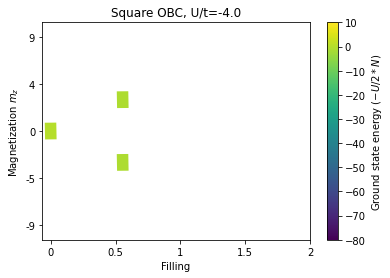

In [28]:
cmap = plt.get_cmap('viridis')
myNorm = matplotlib.colors.Normalize(vmin=-80, vmax=10)
fig,ax = plt.subplots(facecolor='white')
e_lists = [[] for i in range(2*N_sites+1)]
m_lists = [[] for i in range(2*N_sites+1)]
for (nu, nd) in emin_dict.keys():
    xy = (5*(nu+nd)-2, 5*(nu-nd)-4)
    # print(xy)
    val = emin_dict[(nu,nd)]-U/2*(nu+nd)
    e_lists[(nu+nd)].append(val)
    m_lists[(nu+nd)].append(nu-nd)
    # val = emax_dict[o_i][(nu,nd)]-U/2*(nu+nd)
    # rect = RegularPolygon(xy, 4, 4, np.pi/4, fc=cmap(myNorm(val)))
    rect = Rectangle(xy, 4, 8, angle=np.pi/4, fc=cmap(myNorm(val)))
    ax.add_patch(rect)
plt.xlim(-3, 5*N_sites+3)
plt.ylim(-5*N_sites-7,5*N_sites+4+3)
plt.title(f'Square OBC, U/t={U:.1f}')
plt.xlabel('Filling')
plt.xticks(np.linspace(0, N_sites*10, 5), [0, 0.5, 1, 1.5, 2])
plt.yticks(np.linspace(-N_sites*5, N_sites*5, 5), [-N_sites, -N_sites//2, 0, N_sites//2, N_sites])
plt.ylabel('Magnetization $m_z$')
plt.colorbar(ScalarMappable(myNorm, cmap=cmap), ax=plt.gca(), label='Ground state energy ($-U/2*N$)')

In [29]:
save_dir = "ED_data_csv"
print(save_dir)
Path(save_dir).mkdir(parents=True, exist_ok=True)


ED_data_csv


In [32]:
data = dict()
data['Density'] = []
data['U'] = []
data['T'] = []
for i in range(len(quantitites)):
    data[qnames[i]] = []
    data[qnames[i]+" error"] = []
for key, kname in zip(['Z', 'E', 'F', 'S'],["Partition Function","Energy", "Free Energy", "Entropy"]):
    data[kname] = []
    data[kname+" error"] = []

# N_tot_list = list(range(0, N_sites+1))
N_tot_list = [5]
for N_tot in N_tot_list:
    data['Density'].extend(N_tot/N_sites*np.ones(len(T_list)))
    data['U'].extend(U*np.ones(len(T_list)))
    data['T'].extend(T_list)
    
    for i in range(len(quantitites)):
        norm = unumpy.uarray(np.zeros_like(T_list), np.zeros_like(T_list))
        temp_list = unumpy.uarray(np.zeros_like(T_list), np.zeros_like(T_list))
        for (nu,nd) in emin_dict.keys():
            if nu+nd == N_tot:
                factor = thermo_dict['Z'][(nu,nd)]*np.exp(-emin_dict[(nu,nd)]/T_list)
                norm += factor
                temp_list += thermal_avg_q[i][(nu,nd)]*factor
        temp_list /= norm
        data[qnames[i]].extend(unumpy.nominal_values(temp_list))
        data[qnames[i]+" error"].extend(unumpy.std_devs(temp_list))
    
    for key, kname in zip(['F', 'S'],["Free Energy", "Entropy"]):
        norm = unumpy.uarray(np.zeros_like(T_list), np.zeros_like(T_list))
        temp_list = unumpy.uarray(np.zeros_like(T_list), np.zeros_like(T_list))
        for (nu,nd) in emin_dict.keys():
            if nu+nd == N_tot:
                factor = thermo_dict['Z'][(nu,nd)]*np.exp(-emin_dict[(nu,nd)]/T_list)
                norm += factor
                temp_list += thermo_dict[key][(nu,nd)]*factor/N_sites
        temp_list /= norm
        data[kname].extend(unumpy.nominal_values(temp_list))
        data[kname+" error"].extend(unumpy.std_devs(temp_list))
    data['Partition Function'].extend(unumpy.nominal_values(norm))
    data['Partition Function error'].extend(unumpy.std_devs(norm))

# for key in data.keys():
#     print(key, len(data[key]))
df = pandas.DataFrame(data)
filename = os.path.join('ED_data_csv','FTLM_Canonical_Square_U_%.1f_%d_sites_OBC.csv'%(U,N_sites))
df.to_csv(filename, index=False)

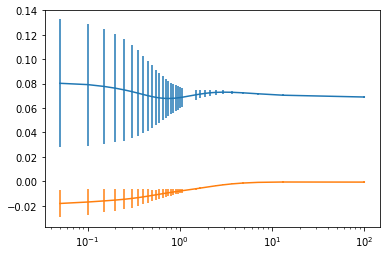

In [34]:
df1 = df[df['Density'] == 5/9]
plt.errorbar(df1['T'], df1['SzSz(1)'], df1['SzSz(1) error'])
plt.errorbar(df1['T'], df1['SxSx(1)'], df1['SxSx(1) error'])
plt.xscale('log')

In [26]:
for ki, key in enumerate(quantitites):
    print(ki, qnames[ki])

0 nn(1.4)
1 nn(2.2)
2 nn(2)
3 SxSx(1)
4 SxSx(1.4)
5 SxSx(2.2)
6 SxSx(2)
7 SzSz(1)
8 SzSz(1.4)
9 SzSz(2.2)
10 SzSz(2)
11 Doublon
12 Energy


C:\Users\anant\AppData\Local\Temp\ipykernel_18484\3989733852.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  density[:idx],
C:\Users\anant\AppData\Local\Temp\ipykernel_18484\3989733852.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  singles[:idx],
C:\Users\anant\AppData\Local\Temp\ipykernel_18484\3989733852.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, c

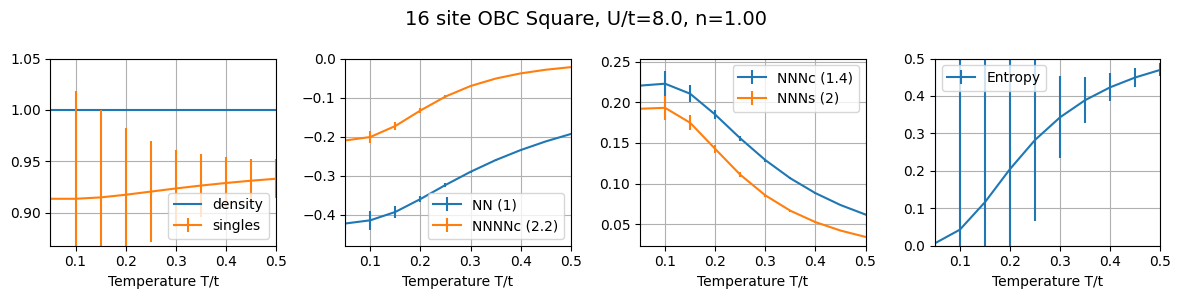

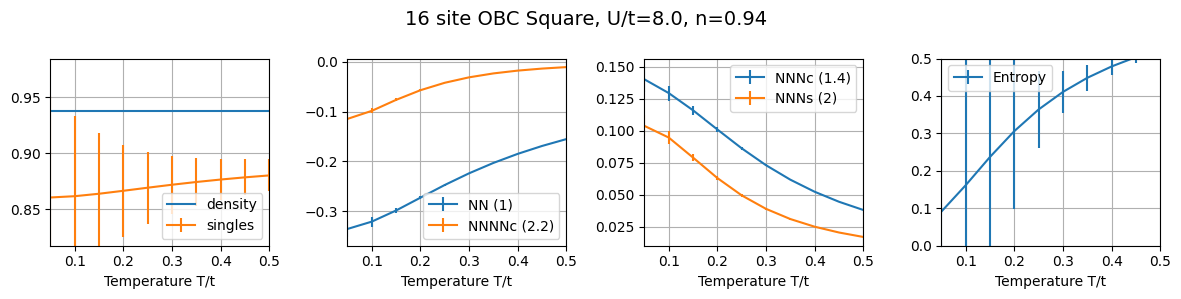

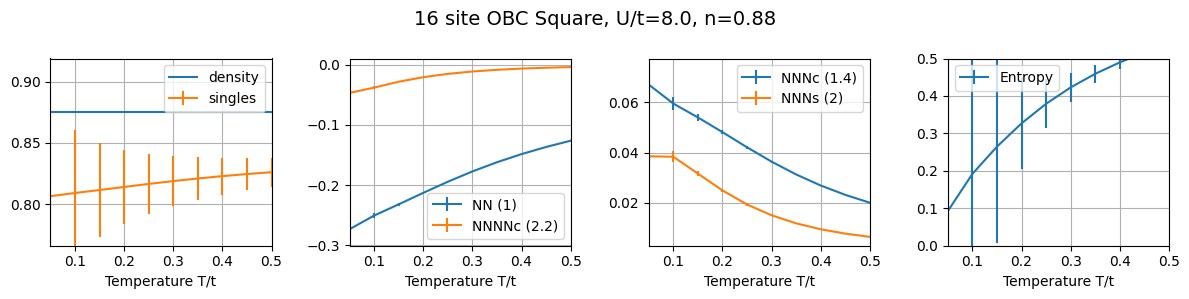

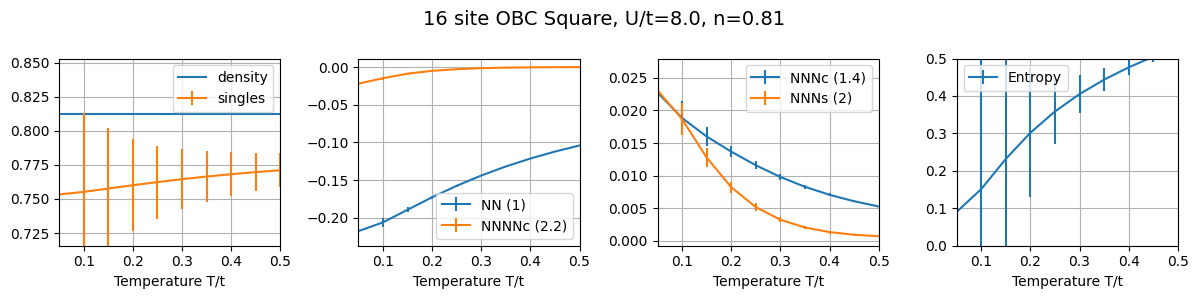

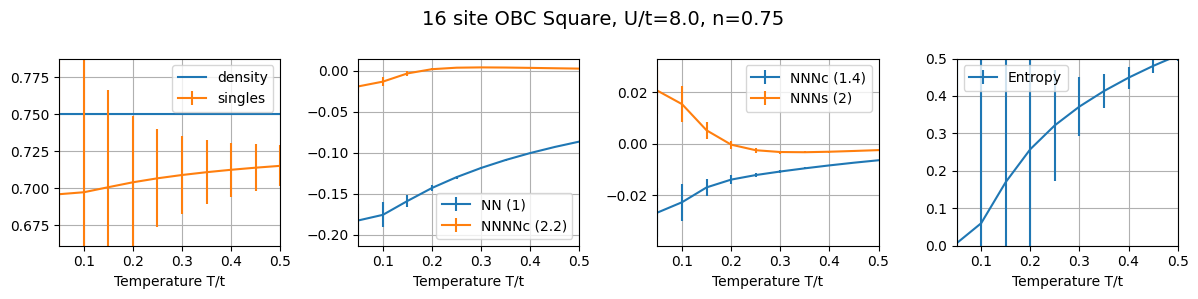

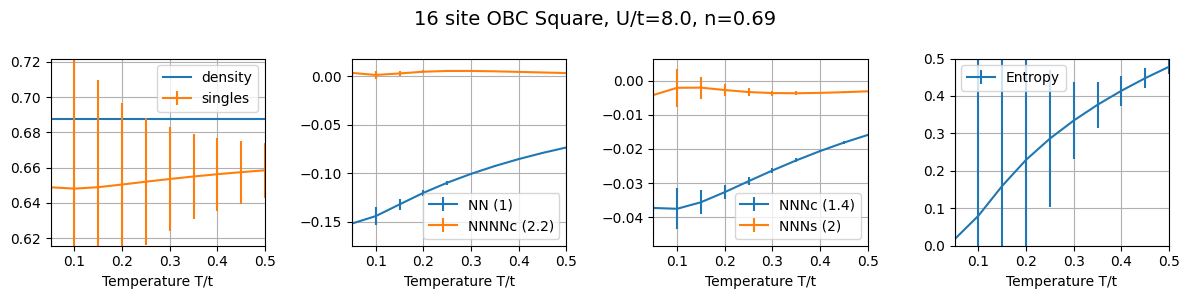

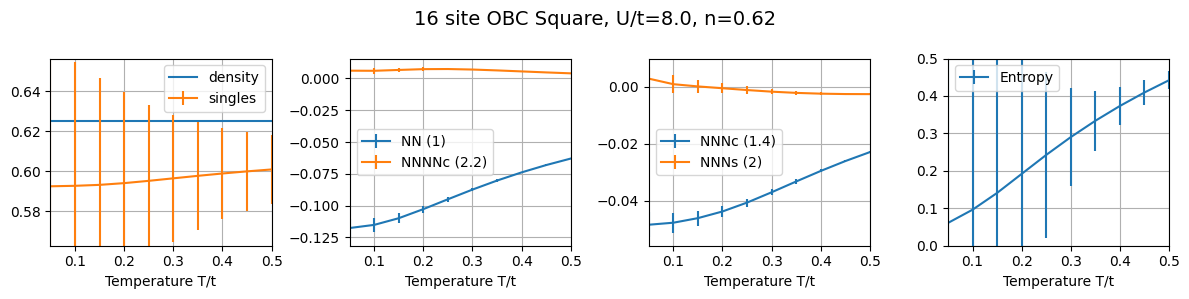

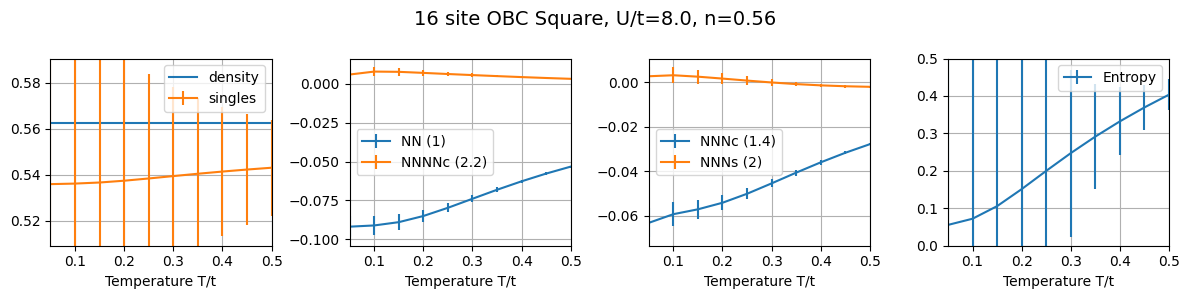

In [27]:
for n in np.arange(1, 0.5, -1/16):
    dfx = df[np.abs(df['Density']-n)<1e-3]
    fig, axs = plt.subplots(ncols=4, facecolor='white', figsize=(12,3))
    fig.suptitle('16 site OBC Square, U/t=%.1f, n=%.2f'%(U, n), fontsize=14)
    
    density = dfx['Density']
    singles = density - 2*dfx['Doublon']
    singles_err = np.sqrt(4*dfx['Doublon error'])
    
    idx = 10

    axs[0].plot(T_list[:idx], 
                 density[:idx], 
                 '-', 
                 label = 'density', 
                 color = 'C0')
    axs[0].errorbar(T_list[:idx], 
                 singles[:idx], 
                 singles_err[:idx], 
                 fmt = '-', 
                 label = 'singles', 
                 color = 'C1')
    
    axs[1].errorbar(T_list[:idx], 
                 dfx['SzSz(1)'][:idx], 
                 dfx['SzSz(1) error'][:idx], 
                 fmt = '-', 
                 label = 'NN (1)', 
                 color = 'C0')
    # axs[1].errorbar(T_list[:idx], 
    #              dfx['SxSx(1)'][:idx],
    #              dfx['SxSx(1) error'][:idx],
    #              fmt = 'x-', 
    #              label = 'NN (X)', 
    #              color = 'C1')

    axs[2].errorbar(T_list[:idx], 
                 dfx['SzSz(1.4)'][:idx],
                 dfx['SzSz(1.4) error'][:idx],
                 fmt = '-', 
                 label = 'NNNc (1.4)', 
                 color = 'C0')
    # axs[2].errorbar(T_list[:idx], 
    #              dfx['SxSx(1.4)'][:idx],
    #              dfx['SxSx(1.4) error'][:idx],
    #              fmt = 'x-', 
    #              label = 'NNN (X)', 
    #              color = 'C1')
    
    axs[2].errorbar(T_list[:idx], 
                 dfx['SzSz(2)'][:idx],
                 dfx['SzSz(2) error'][:idx],
                 fmt = '-', 
                 label = 'NNNs (2)', 
                 color = 'C1')
    # axs[2].errorbar(T_list[:idx], 
    #              dfx['SxSx(2)'][:idx],
    #              dfx['SxSx(2) error'][:idx],
    #              fmt = 'x-', 
    #              label = 'NNN (X)', 
    #              color = 'C3')
    
    axs[1].errorbar(T_list[:idx], 
                 dfx['SzSz(2.2)'][:idx],
                 dfx['SzSz(2.2) error'][:idx],
                 fmt = '-', 
                 label = 'NNNNc (2.2)', 
                 color = 'C1')
    # axs[3].errorbar(T_list[:idx], 
    #              dfx['SxSx(2.2)'][:idx],
    #              dfx['SxSx(2.2) error'][:idx],
    #              fmt = 'x-', 
    #              label = 'NNN (X)', 
    #              color = 'C1')
    
    
    axs[3].errorbar(T_list[:idx], 
                 dfx['Entropy'][:idx],
                 dfx['Entropy error'][:idx],
                 fmt = '-', 
                 label = 'Entropy', 
                 color = 'C0')
    axs[3].set_ylim(0, 0.5)
    axs[0].set_ylim(0.95*min(singles[:idx]), max(density[:idx])*1.05)

    for ax in axs:
        ax.set_xlabel('Temperature T/t')
        # ax.set_ylabel('Spin correlations')
        ax.set_xlim(0.05,0.5)
        ax.set_xticks(np.linspace(0.1, 0.5, 5))
        ax.legend()
        ax.grid()
    plt.tight_layout()
    plt.show()

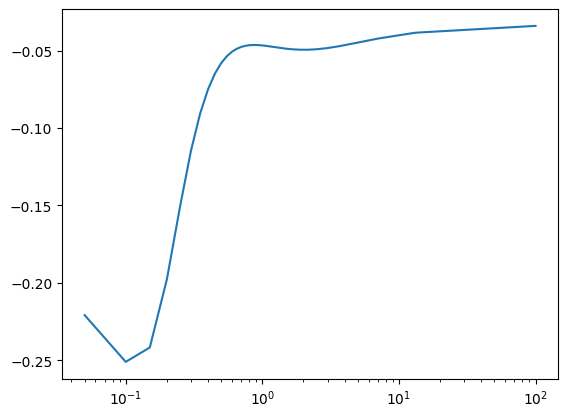

In [28]:
plt.plot(T_list, unumpy.nominal_values(thermal_avg_q[9][(8,8)]))
plt.xscale('log')

In [34]:
beta_list = 1/T_list
# mu_list = np.linspace(-2-U,2+U,  int((4+2*U)/0.25)+1)
mu_list = np.linspace(-4,0, 121)
print(mu_list)
# mu_list = np.linspace(-2-U,2+U,  21)
thermo_dict2, grand_avg_q = compute_grand_average_v2(mu_list, beta_list, U, 0.46, thermo_dict, thermal_avg_q, emin_dict)

[-4.         -3.96666667 -3.93333333 -3.9        -3.86666667 -3.83333333
 -3.8        -3.76666667 -3.73333333 -3.7        -3.66666667 -3.63333333
 -3.6        -3.56666667 -3.53333333 -3.5        -3.46666667 -3.43333333
 -3.4        -3.36666667 -3.33333333 -3.3        -3.26666667 -3.23333333
 -3.2        -3.16666667 -3.13333333 -3.1        -3.06666667 -3.03333333
 -3.         -2.96666667 -2.93333333 -2.9        -2.86666667 -2.83333333
 -2.8        -2.76666667 -2.73333333 -2.7        -2.66666667 -2.63333333
 -2.6        -2.56666667 -2.53333333 -2.5        -2.46666667 -2.43333333
 -2.4        -2.36666667 -2.33333333 -2.3        -2.26666667 -2.23333333
 -2.2        -2.16666667 -2.13333333 -2.1        -2.06666667 -2.03333333
 -2.         -1.96666667 -1.93333333 -1.9        -1.86666667 -1.83333333
 -1.8        -1.76666667 -1.73333333 -1.7        -1.66666667 -1.63333333
 -1.6        -1.56666667 -1.53333333 -1.5        -1.46666667 -1.43333333
 -1.4        -1.36666667 -1.33333333 -1.3        -1

100%|██████████| 121/121 [01:27<00:00,  1.38it/s]


Total time taken: 89.14 seconds


Text(0, 0.5, 'Log[Partition function Z]')

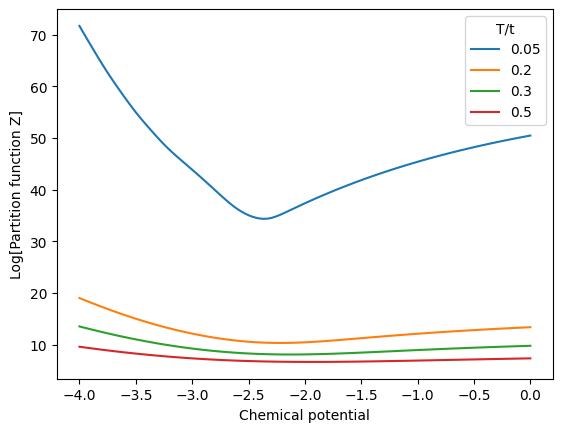

In [35]:
Zmu_list = thermo_dict2['Z']
# plt.errorbar(mu_list, Zmu_vals[:,3], Zmu_errs[:,3], fmt='-')
plt.plot(mu_list, np.log10(unumpy.nominal_values(Zmu_list)[:,0]), label = 1/beta_list[0])
plt.plot(mu_list, np.log10(unumpy.nominal_values(Zmu_list)[:,3]), label = 1/beta_list[3])
plt.plot(mu_list, np.log10(unumpy.nominal_values(Zmu_list)[:,5]), label = 1/beta_list[5])
plt.plot(mu_list, np.log10(unumpy.nominal_values(Zmu_list)[:,9]), label = 1/beta_list[9])
plt.legend(title='T/t')
plt.xlabel('Chemical potential')
plt.ylabel('Log[Partition function Z]')
# plt.plot(mu_list, Zmu_vals[:,-10])
# plt.yscale('log')


In [ ]:
len(qnames)

13

In [31]:
mu_2d, T_list_2d = np.meshgrid(mu_list, T_list, indexing='ij')

data = dict()
N_2d = len(mu_2d.flatten())
data['U'] = list(np.repeat(U, N_2d))
data['T'] = list(T_list_2d.flatten())
# data['Offset'] = list(np.repeat(Offset, N_2d))
data['mu'] = list(mu_2d.flatten())

data["Density"] = unumpy.nominal_values(thermo_dict2['N'].flatten()/N_sites)
data["Density error"] = unumpy.std_devs(thermo_dict2['N'].flatten()/N_sites)


for i in range(len(grand_avg_q)): 
    # print(i)
    data[qnames[i]] = unumpy.nominal_values(grand_avg_q[i].flatten())
    data[qnames[i] + " error"] = unumpy.std_devs(grand_avg_q[i].flatten())

data["Energy"] = unumpy.nominal_values(thermo_dict2['E'].flatten())
data["Energy error"] = unumpy.std_devs(thermo_dict2['E'].flatten())

data["Entropy"] = unumpy.nominal_values(thermo_dict2['S'].flatten()/N_sites)
data["Entropy error"] = unumpy.std_devs(thermo_dict2['S'].flatten()/N_sites)

data["Heat Capacity"] = unumpy.nominal_values(thermo_dict2['Cv'].flatten()/N_sites)
data["Heat Capacity error"] = unumpy.std_devs(thermo_dict2['Cv'].flatten()/N_sites)

data["Compressibility"] = unumpy.nominal_values(thermo_dict2['kappa'].flatten()/N_sites)
data["Compressibility error"] = unumpy.std_devs(thermo_dict2['kappa'].flatten()/N_sites)

df = pandas.DataFrame(data)
filename = os.path.join('ED_data_csv','FTLM_Grand_Square_U_%.1f_%d_sites_OBC.csv'%(U,N_sites))
df.to_csv(filename, index=False)

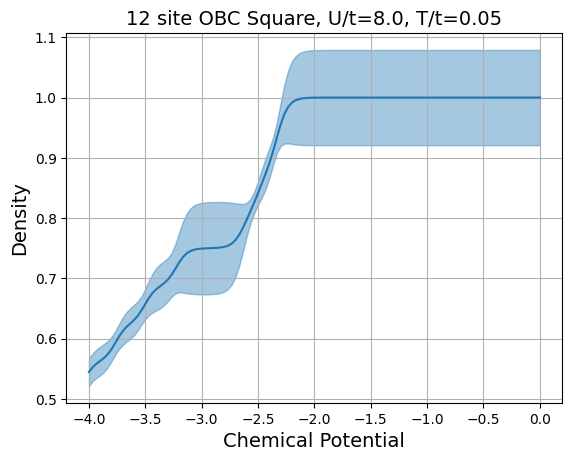

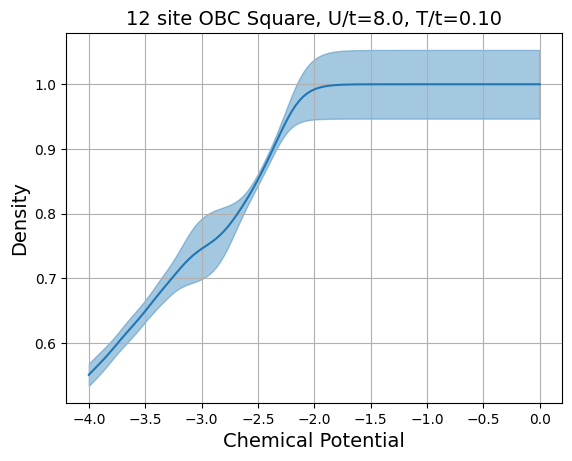

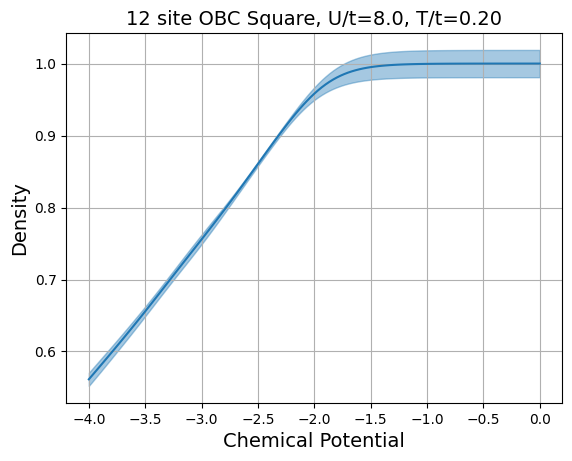

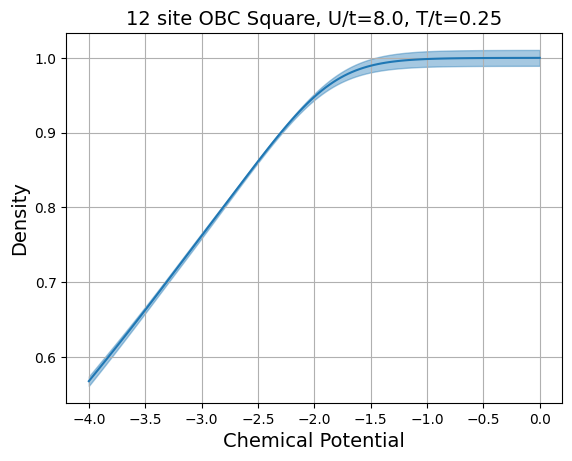

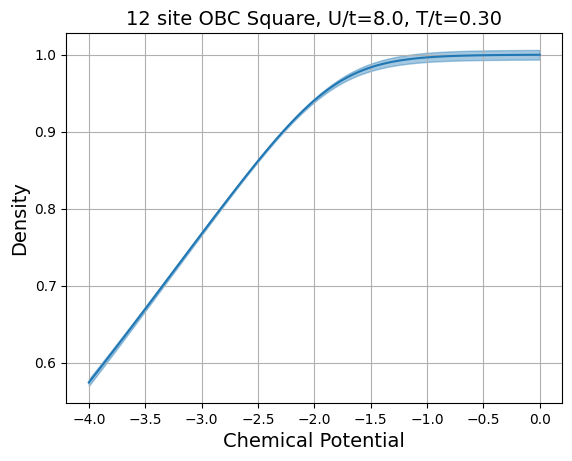

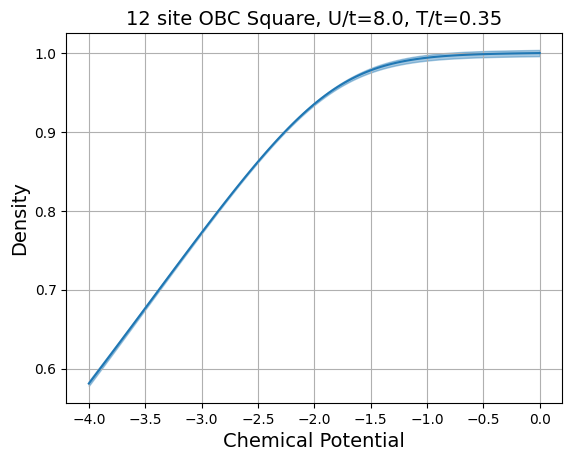

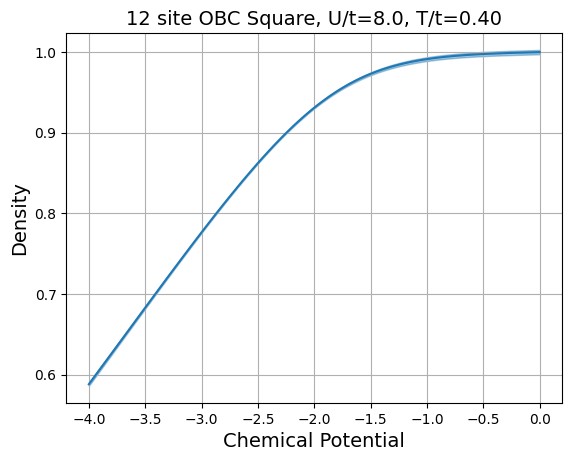

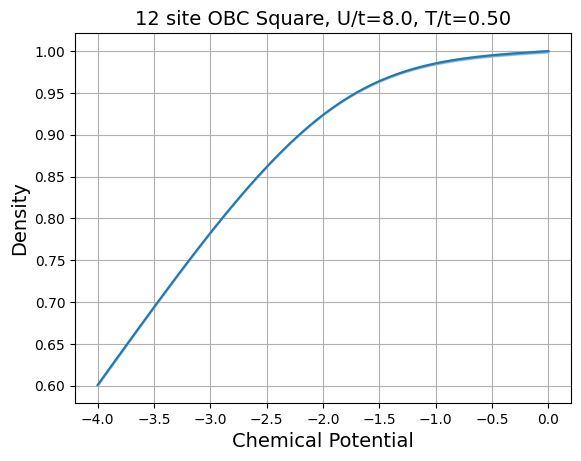

In [36]:
for T_i in [0, 1, 3,4, 5,6, 7, 9,]:
    T = 1/beta_list[T_i]
    plt.figure(facecolor='white')
    plt.title('12 site OBC Square, U/t=%.1f, T/t=%.2f'%(U, 1/beta_list[T_i]), fontsize=14)
    # density = (grand_avg_q[1][:,T_i] + 2*grand_avg_q[2][:,T_i])
        
    plt.plot(mu_list, 
            unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites),
                 color = 'C0')
    plt.fill_between(mu_list, 
             unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites)-unumpy.std_devs(thermo_dict2['N'][:,T_i]/N_sites),
             unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites)+unumpy.std_devs(thermo_dict2['N'][:,T_i]/N_sites),
                 alpha=0.4,
                 color = 'C0')
    plt.xlabel('Chemical Potential', fontsize=14)
    # plt.ylim(0,2)
    # plt.xlim(-1,1)
    # plt.ylim(0.75,1.25)
    # plt.yscale('log')
    plt.ylabel('Density', fontsize=14)
    # plt.legend(loc='lower right')
    plt.grid()
    plt.show()

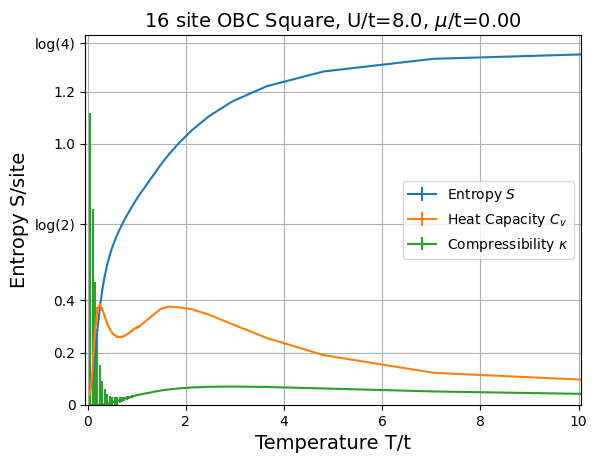

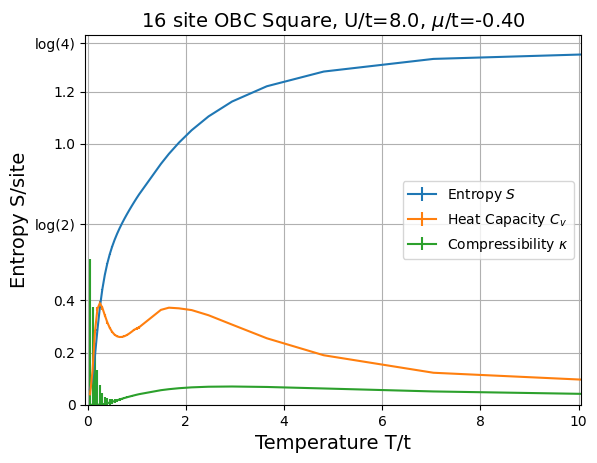

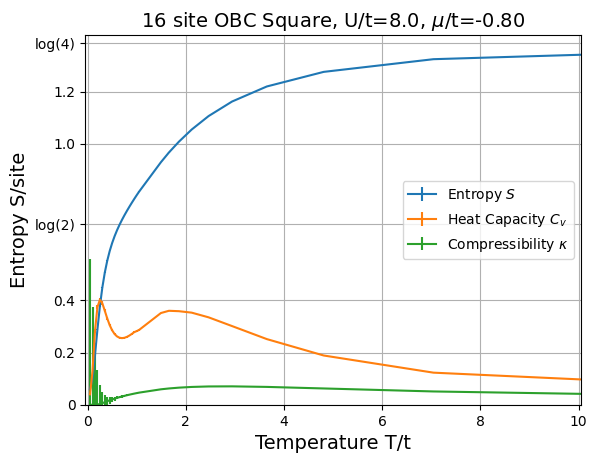

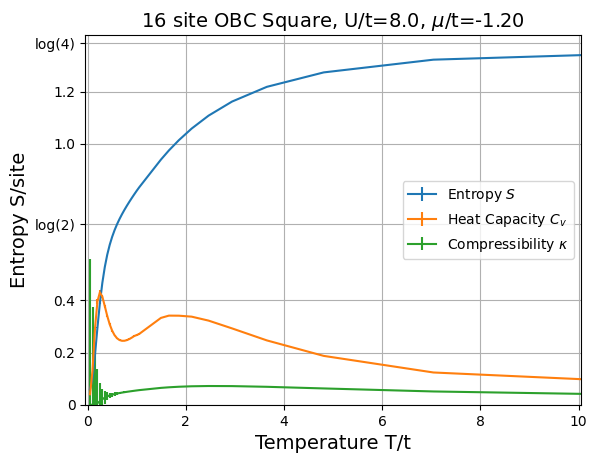

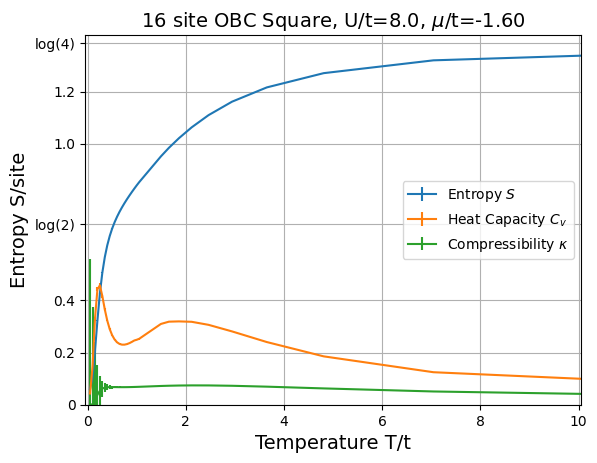

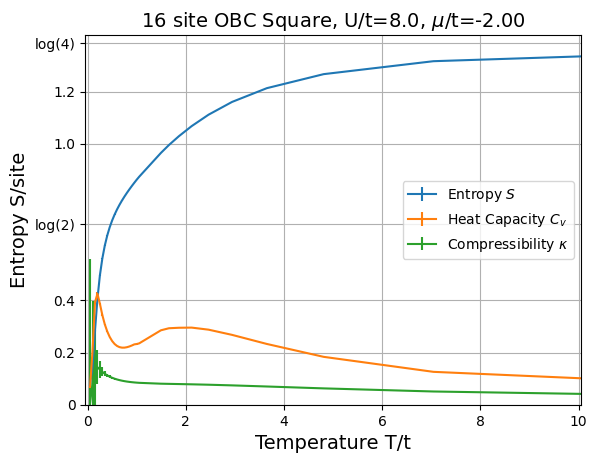

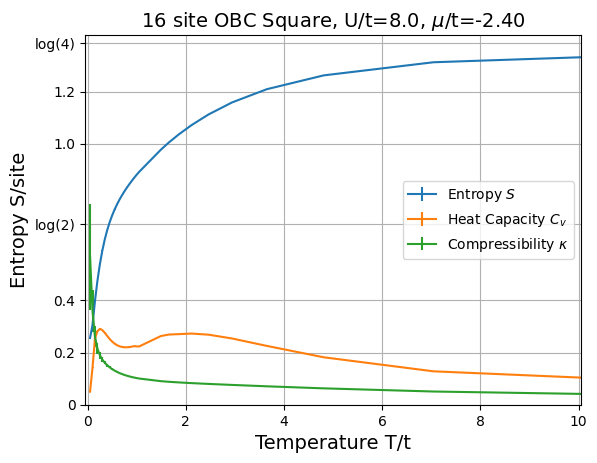

In [28]:
for mi in [40, 36, 32, 28, 24, 20, 16]: #85
    mu = mu_list[mi]
    plt.figure(facecolor='white')
    plt.title('16 site OBC Square, U/t=%.1f, $\\mu$/t=%.2f'%(U, mu), fontsize=14)
    S0 = thermo_dict2['S'][mi,:]
    Cv = thermo_dict2['Cv'][mi,:]
    kappa = thermo_dict2['kappa'][mi,:]
    plt.errorbar(1/beta_list, 
            unumpy.nominal_values(S0)/N_sites,
             unumpy.std_devs(S0)/N_sites,
                fmt='-', 
                color = 'C0',
                label='Entropy $S$')
    plt.errorbar(1/beta_list, 
            unumpy.nominal_values(Cv)/N_sites,
             unumpy.std_devs(Cv)/N_sites,
                fmt='-', 
                color = 'C1',
                label='Heat Capacity $C_v$')
    plt.errorbar(1/beta_list, 
            unumpy.nominal_values(kappa)/N_sites,
             unumpy.std_devs(kappa)/N_sites,
                fmt='-', 
                color = 'C2',
                label='Compressibility $\kappa$')
    plt.xlabel('Temperature T/t', fontsize=14)
    plt.ylim(0,np.log(4)+3e-2)
    plt.yticks([0,0.2,0.4, np.log(2), 1.0, 1.2, np.log(4)], [0,0.2,0.4, 'log(2)', 1.0, 1.2, 'log(4)'] )
    # plt.xlim(.05,0.5)
    plt.xlim(-0.05, 10.05)
    # plt.ylim(-10,25)
#     plt.xscale('log')
    plt.ylabel('Entropy S/site', fontsize=14)
    plt.legend(loc='center right')
    plt.grid()
    plt.show()

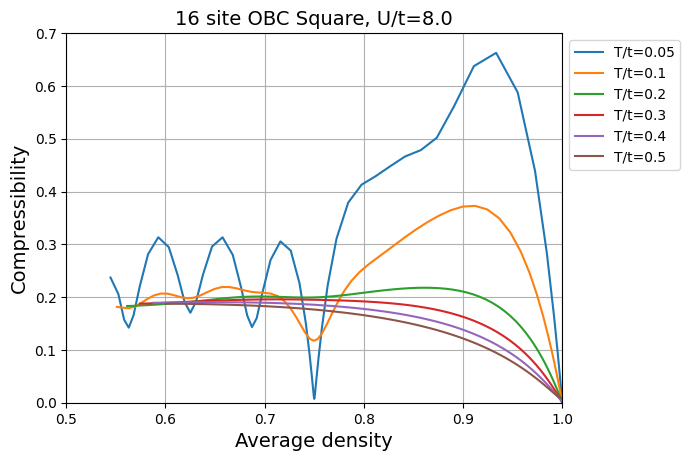

In [43]:
plt.figure(facecolor='white')
plt.title('16 site OBC Square, U/t=%.1f'%(U), fontsize=14)
for T_i in [0, 1, 3, 5, 7, 9,]:
    T = 1/beta_list[T_i]
    
    density = unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites)
    
    Cv = thermo_dict2['Cv'][:,T_i]
    kappa = thermo_dict2['kappa'][:,T_i]
    
    plt.errorbar(density, 
                 unumpy.nominal_values(kappa/N_sites), 
                #  yerr = unumpy.std_devs(kappa/N_sites), 
                 fmt = '-', 
                 label = f'T/t={T}', 
                 )
    
plt.xlabel('Average density', fontsize=14)
#     plt.xlim(-15,15)
plt.ylim(0,0.7)
plt.xlim(0.5,1)
# plt.ylim(0.75,1.25)
plt.ylabel('Compressibility', fontsize=14)
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.grid()
plt.show()

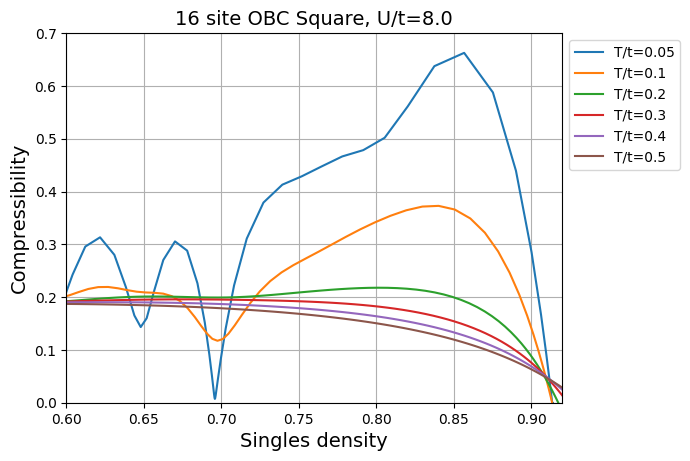

In [45]:
plt.figure(facecolor='white')
plt.title('16 site OBC Square, U/t=%.1f'%(U), fontsize=14)
for T_i in [0, 1, 3, 5, 7, 9,]:
    T = 1/beta_list[T_i]

    singles = unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites- 2*grand_avg_q[11][:,T_i])        #d

    Cv = thermo_dict2['Cv'][:,T_i]
    kappa = thermo_dict2['kappa'][:,T_i]
    
    plt.errorbar(singles, 
                 unumpy.nominal_values(kappa/N_sites), 
                #  yerr = unumpy.std_devs(kappa/N_sites), 
                 fmt = '-', 
                 label = f'T/t={T}', 
                 )
    
plt.xlabel('Singles density', fontsize=14)
#     plt.xlim(-15,15)
plt.ylim(0,0.7)
plt.xlim(0.6,0.92)
# plt.ylim(0.75,1.25)
plt.ylabel('Compressibility', fontsize=14)
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.grid()
plt.show()

In [36]:
for i in range(len(quantitites)):
    print(i, qnames[i])

0 nn(1.4)
1 nn(2.2)
2 nn(2)
3 SxSx(1)
4 SxSx(1.4)
5 SxSx(2.2)
6 SxSx(2)
7 SzSz(1)
8 SzSz(1.4)
9 SzSz(2.2)
10 SzSz(2)
11 Doublon
12 Energy


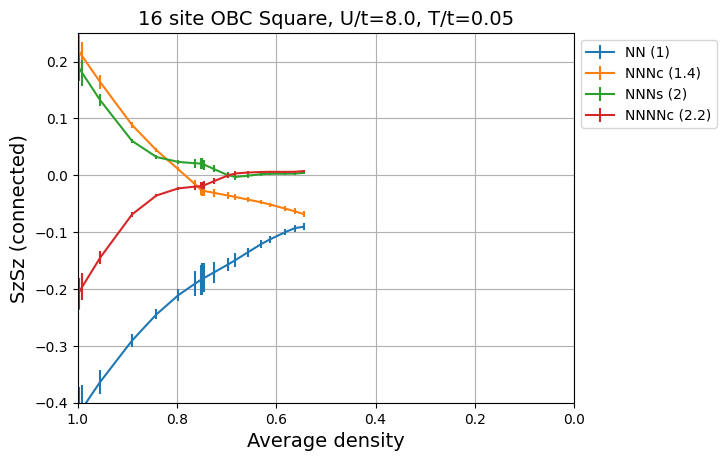

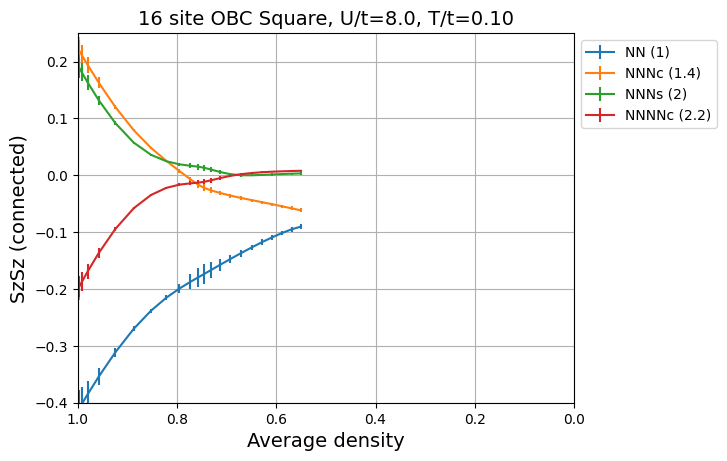

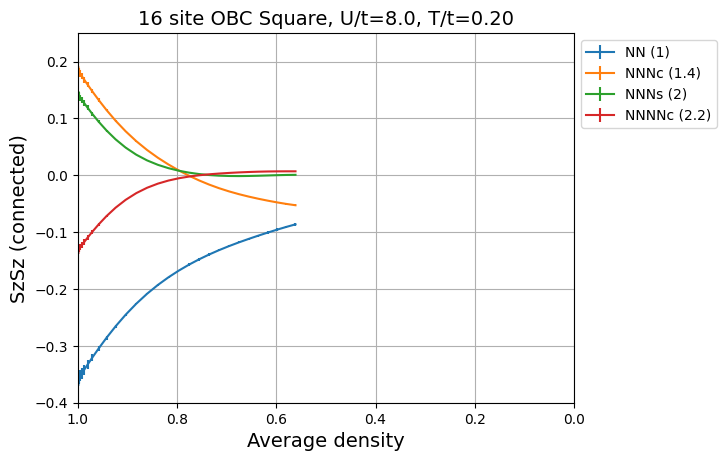

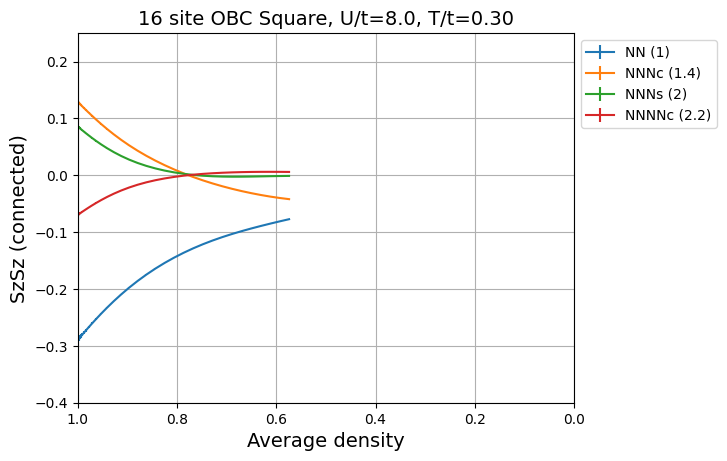

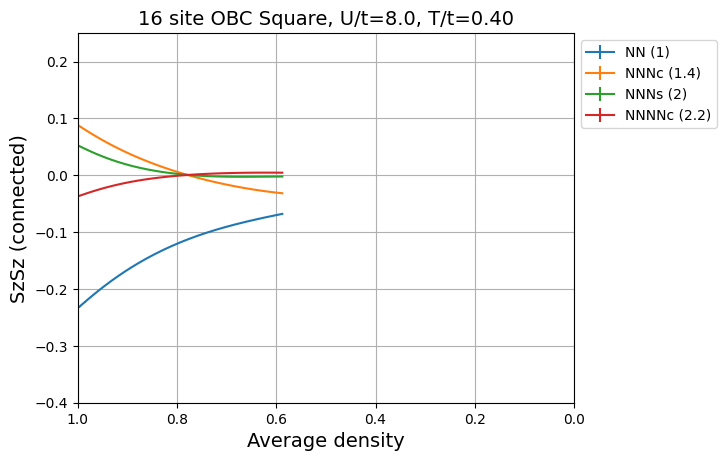

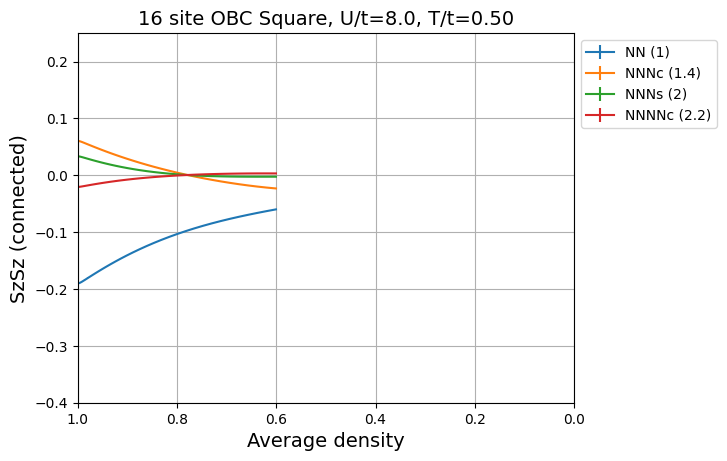

In [29]:
for T_i in [0, 1, 3, 5, 7, 9,]:
    T = 1/beta_list[T_i]
    plt.figure(facecolor='white')
    plt.title('16 site OBC Square, U/t=%.1f, T/t=%.2f'%(U, 1/beta_list[T_i]), fontsize=14)
    
    density = unumpy.nominal_values(thermo_dict2['N'][:,T_i]/N_sites)
    
    temp_list4 = ((grand_avg_q[7][:,T_i]))        
    temp_list5 = ((grand_avg_q[8][:,T_i]))      
    temp_list6 = ((grand_avg_q[10][:,T_i]))        
    temp_list7 = ((grand_avg_q[9][:,T_i]))      
    
    
    plt.errorbar(density, 
                 unumpy.nominal_values(temp_list4), 
                 yerr = unumpy.std_devs(temp_list4), 
                 fmt = '-', 
                 label = 'NN (1)', 
                 color = 'C0')
    
    plt.errorbar(density, 
                 unumpy.nominal_values(temp_list5), 
                 yerr = unumpy.std_devs(temp_list5), 
                 fmt = '-', 
                 label = 'NNNc (1.4)', 
                 color = 'C1')
    
    plt.errorbar(density, 
                 unumpy.nominal_values(temp_list6), 
                 yerr = unumpy.std_devs(temp_list6), 
                 fmt = '-', 
                 label = 'NNNs (2)', 
                 color = 'C2')
    
    plt.errorbar(density, 
                 unumpy.nominal_values(temp_list7), 
                 yerr = unumpy.std_devs(temp_list7), 
                 fmt = '-', 
                 label = 'NNNNc (2.2)', 
                 color = 'C3')
    
    plt.xlabel('Average density', fontsize=14)
#     plt.xlim(-15,15)
    plt.ylim(-0.4,0.25)
    plt.xlim(1,0)
    # plt.ylim(0.75,1.25)
    plt.ylabel('SzSz (connected)', fontsize=14)
    plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.grid()
    plt.show()

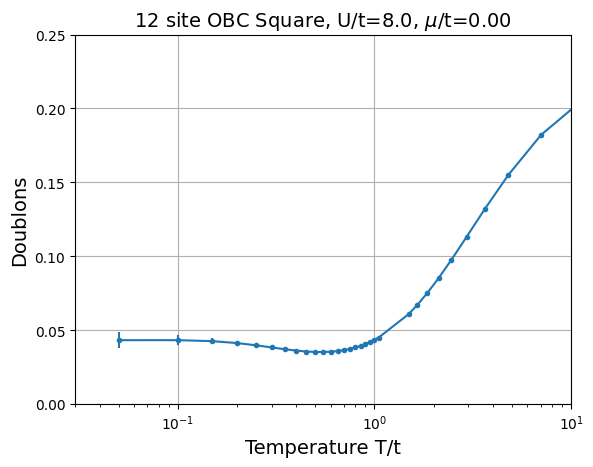

In [38]:
for m_i in [40]:#[50, 36, 28, 22]:
    plt.figure(facecolor='white')
    plt.title('12 site OBC Square, U/t=%.1f, $\\mu$/t=%.2f'%(U, mu_list[m_i]), fontsize=14)
    
    temp_list4 = ((grand_avg_q[11][m_i]))        #d (NN)
     
    plt.errorbar(1/beta_list, 
                 unumpy.nominal_values(temp_list4), 
                 yerr = unumpy.std_devs(temp_list4), 
                 fmt = '.-', 
                 color = 'C0')
    
    
    plt.xlabel('Temperature T/t', fontsize=14)
#     plt.xlim(-15,15)
    plt.ylim(0,0.25)
    plt.xlim(0.03,10)
    plt.xscale('log')
    plt.ylabel('Doublons', fontsize=14)
    # plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.grid()
    plt.show()

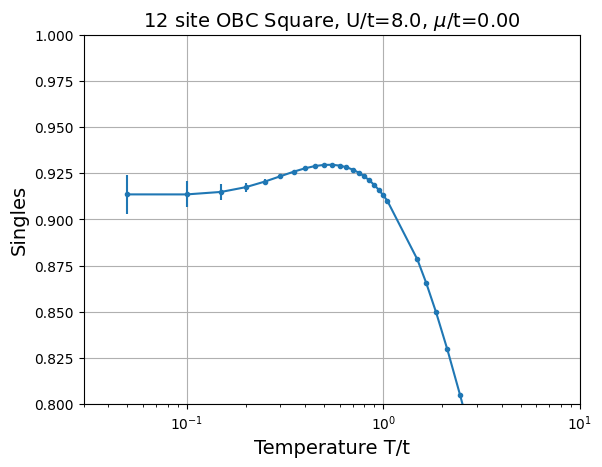

In [39]:
for m_i in [40]:#[50, 36, 28, 22]:
    plt.figure(facecolor='white')
    plt.title('12 site OBC Square, U/t=%.1f, $\\mu$/t=%.2f'%(U, mu_list[m_i]), fontsize=14)
    
    temp_list4 = unumpy.nominal_values(thermo_dict2['N'][m_i,:]/N_sites) - 2*grand_avg_q[11][m_i]       #d (NN)
     
    plt.errorbar(1/beta_list, 
                 unumpy.nominal_values(temp_list4), 
                 yerr = unumpy.std_devs(temp_list4), 
                 fmt = '.-', 
                 color = 'C0')
    
    
    plt.xlabel('Temperature T/t', fontsize=14)
#     plt.xlim(-15,15)
    plt.ylim(0.8, 1)
    plt.xlim(0.03,10)
    plt.xscale('log')
    plt.ylabel('Singles', fontsize=14)
    # plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.grid()
    plt.show()

In [41]:
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_%d_sites_OBC_values.npy'%(N_sites, U))
with open(filename, 'wb') as f:
    for qi in range(len(grand_avg_q)):
        np.save(f, unumpy.nominal_values(grand_avg_q[qi][:,:]))
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_%d_sites_OBC_errors.npy'%(N_sites, U))
with open(filename, 'wb') as f:
    for qi in range(len(grand_avg_q)):
        np.save(f, unumpy.std_devs(grand_avg_q[qi][:,:]))
        

In [42]:
thermo_dict2_vals = {}
thermo_dict2_errs = {}
for key in thermo_dict2.keys():
    thermo_dict2_vals[key] = unumpy.nominal_values(thermo_dict2[key])
    thermo_dict2_errs[key] = unumpy.std_devs(thermo_dict2[key])
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_12site_OBC_thermo_values.npz'%(U))
with open(filename, 'wb') as f:
    np.savez(f, **thermo_dict2_vals)
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_12site_OBC_thermo_errors.npz'%(U))
with open(filename, 'wb') as f:
    np.savez(f, **thermo_dict2_errs)

In [43]:
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_12site_OBC_mu_list.txt'%(U))
with open(filename, 'wb') as f:
    np.savetxt(f, mu_list)
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_12site_OBC_T_list.txt'%(U))
with open(filename, 'wb') as f:
    np.savetxt(f, 1/beta_list)

In [44]:
emin_dict_copy = {}
for key in emin_dict.keys():
    emin_dict_copy[str(key)] = emin_dict[key]
filename = os.path.join('ED_data','Square_Grand_U_t_%.1f_12site_OBC_emin_dict.npz'%(U))
with open(filename, 'wb') as f:
    np.savez(f, **emin_dict_copy)

# With B-field

In [55]:
mu=0
dmu_list = np.linspace(-2,2, 101)
thermo_dict2, grand_avg_q2 = compute_grand_average_with_Bfield_v2(dmu_list, beta_list, mu, U, 0.35, 0.75, thermo_dict, thermal_avg_q, emin_dict)

100%|██████████| 101/101 [00:30<00:00,  3.33it/s]


Total time taken: 31.04 seconds


Text(0, 0.5, 'Log[Partition function Z]')

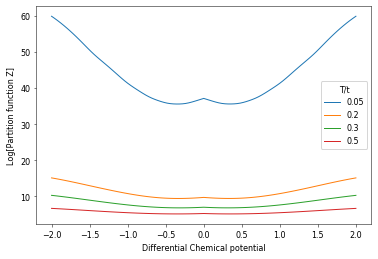

In [56]:
Zdmu_list = thermo_dict2['Z']
# plt.errorbar(mu_list, Zmu_vals[:,3], Zmu_errs[:,3], fmt='-')
plt.plot(dmu_list, np.log10(unumpy.nominal_values(Zdmu_list)[:,0]), label = 1/beta_list[0])
plt.plot(dmu_list, np.log10(unumpy.nominal_values(Zdmu_list)[:,3]), label = 1/beta_list[3])
plt.plot(dmu_list, np.log10(unumpy.nominal_values(Zdmu_list)[:,5]), label = 1/beta_list[5])
plt.plot(dmu_list, np.log10(unumpy.nominal_values(Zdmu_list)[:,9]), label = 1/beta_list[9])
plt.legend(title='T/t')
plt.xlabel('Differential Chemical potential')
plt.ylabel('Log[Partition function Z]')
# plt.plot(mu_list, Zmu_vals[:,-10])
# plt.yscale('log')


In [40]:
filename = os.path.join('ED_data','Square_Grand_Bfield_U_t_%.1f_mu_%.2f_12site_PBC_values.npy'%(U, mu))
with open(filename, 'wb') as f:
    np.save(f, unumpy.nominal_values(Zdmu_list[:,:]))
    for qi in range(len(quantities)):
        np.save(f, unumpy.nominal_values(grand_avg_q2[qi][:,:]))
filename = os.path.join('ED_data','Square_Grand_Bfield_U_t_%.1f_mu_%.2f_12site_PBC_errors.npy'%(U, mu))
with open(filename, 'wb') as f:
    np.save(f, unumpy.std_devs(Zdmu_list[:,:]))
    for qi in range(len(quantities)):
        np.save(f, unumpy.std_devs(grand_avg_q2[qi][:,:]))

filename = os.path.join('ED_data','Square_Grand_Bfield_U_t_%.1f_mu_%.2f_12site_PBC_dmu_list.txt'%(U, mu))
with open(filename, 'wb') as f:
    np.savetxt(f, dmu_list)
filename = os.path.join('ED_data','Square_Grand_Bfield_U_t_%.1f_mu_%.2f_12site_PBC_T_list.txt'%(U, mu))
with open(filename, 'wb') as f:
    np.savetxt(f, 1/beta_list)
        

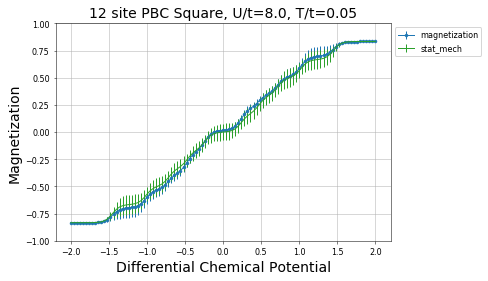

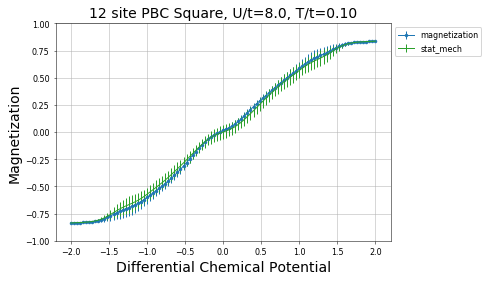

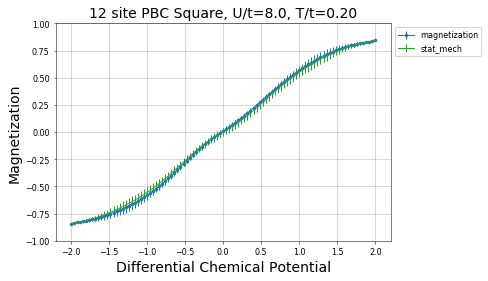

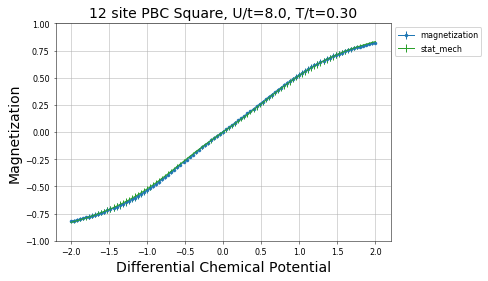

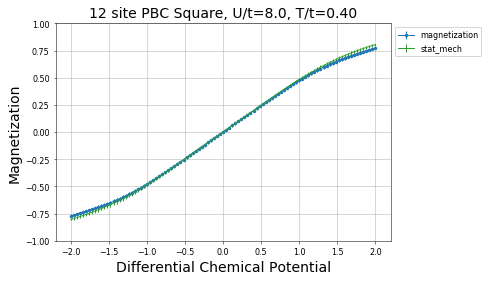

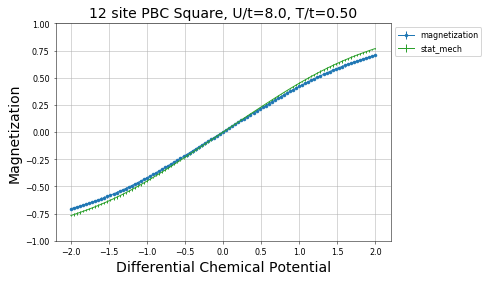

In [57]:
for T_i in [0, 1, 3, 5, 7, 9,]:
    T = 1/beta_list[T_i]
    plt.figure(facecolor='white')
    plt.title('12 site PBC Square, U/t=%.1f, T/t=%.2f'%(U, 1/beta_list[T_i]), fontsize=14)
    temp_list = ((grand_avg_q2[3][:,T_i]))
    plt.errorbar(dmu_list, 
                 unumpy.nominal_values(temp_list), 
                 yerr = unumpy.std_devs(temp_list), 
                 fmt = '.-', 
                 label = 'magnetization', 
                 color = 'C0')
    mag = ((thermo_dict2['M'][:,T_i]))/N_sites
    plt.errorbar(dmu_list, 
                 unumpy.nominal_values(mag), 
                 yerr = unumpy.std_devs(mag), 
                 fmt = '-', 
                 label = 'stat_mech', 
                 color = 'C2')
    
    plt.xlabel('Differential Chemical Potential', fontsize=14)
#     plt.xlim(-15,15)
    plt.ylim(-1,1)
    # plt.xlim(-1,1)
    # plt.ylim(0.75,1.25)
    plt.ylabel('Magnetization', fontsize=14)
    plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.grid()
    plt.show()

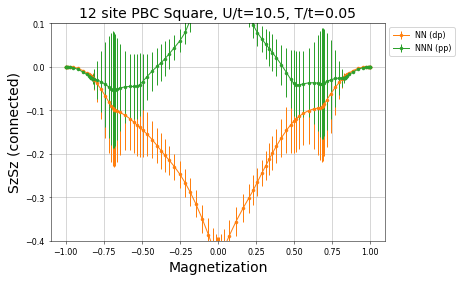

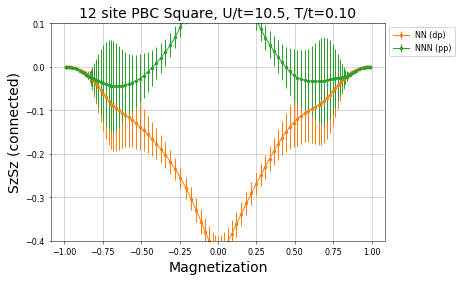

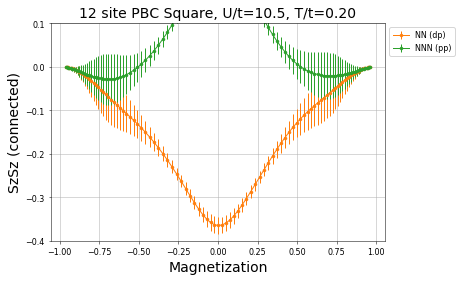

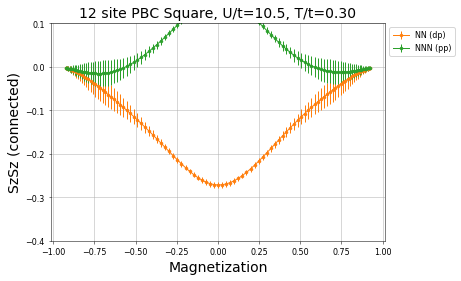

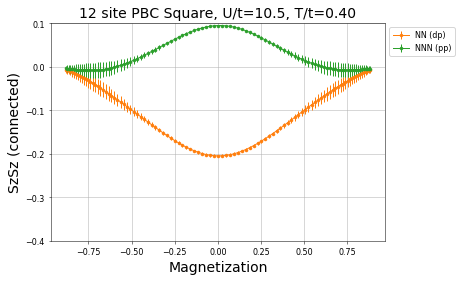

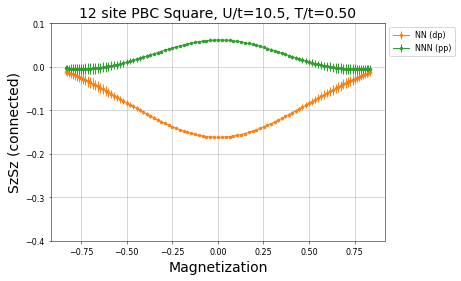

In [42]:
for T_i in [0, 1, 3, 5, 7, 9, ]:
    T = 1/beta_list[T_i]
    plt.figure(facecolor='white')
    plt.title('12 site PBC Square, U/t=%.1f, T/t=%.2f'%(U, 1/beta_list[T_i]), fontsize=14)
    temp_list2 = ((grand_avg_q2[3][:,T_i]))     #d
    mag = unumpy.nominal_values(temp_list2)
    
    temp_list4 = ((grand_avg_q2[4][:,T_i])-grand_avg_q2[3][:,T_i]**2)        #d (NN)
    temp_list5 = ((grand_avg_q2[7][:,T_i])-grand_avg_q2[3][:,T_i]**2)       #p (NNN)
    # temp_list6 = ((grand_avg_q[10][:,T_i])-grand_avg_q[3][:,T_i]**2)           #d (NNN)
    
    
    plt.errorbar(mag, 
                 unumpy.nominal_values(temp_list4), 
                 yerr = unumpy.std_devs(temp_list4), 
                 fmt = '.-', 
                 label = 'NN (dp)', 
                 color = 'C1')
    
    plt.errorbar(mag, 
                 unumpy.nominal_values(temp_list5), 
                 yerr = unumpy.std_devs(temp_list5), 
                 fmt = '.-', 
                 label = 'NNN (pp)', 
                 color = 'C2')
    # plt.errorbar(density, 
    #              unumpy.nominal_values(temp_list6), 
    #              yerr = unumpy.std_devs(temp_list6), 
    #              fmt = '.-', 
    #              label = 'NNN (dd)', 
    #              color = 'C3')
    
    plt.xlabel('Magnetization', fontsize=14)
#     plt.xlim(-15,15)
    plt.ylim(-0.4,0.1)
    # plt.xlim(0,2)
    # plt.ylim(0.75,1.25)
    plt.ylabel('SzSz (connected)', fontsize=14)
    plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.grid()
    plt.show()

In [212]:
# Helper function
def u_gradient(uy, ux):
    '''
    Equivalent of uy = np.gradient(uy, ux) but for unumpy
    computes dy/dx
    '''
    dx = ux[1:]-ux[:-1]
    dx1 = dx[0:-1]
    dx2 = dx[1:]
    slice1 = slice(1, -1)
    slice2 = slice(None, -2)
    slice3 = slice(1, -1)
    slice4 = slice(2, None)
    a = -(dx2)/(dx1 * (dx1 + dx2))
    b = (dx2 - dx1) / (dx1 * dx2)
    c = dx1 / (dx2 * (dx1 + dx2))
    out = unumpy.uarray(np.zeros(len(uy)), np.zeros(len(uy)))
    out[slice1] = a * uy[slice2] + b * uy[slice3] + c * uy[slice4]

    slice1 = 0
    slice2 = 1
    slice3 = 0
    dx_0 = dx[0]
    out[slice1] = (uy[slice2] - uy[slice3]) / dx_0

    slice1 = -1
    slice2 = -1
    slice3 = -2
    dx_n = dx[-1]
    out[slice1] = (uy[slice2] - uy[slice3]) / dx_n
    return out

In [63]:
dmu_list[50]

0.0

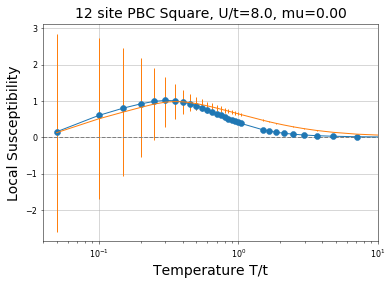

In [62]:
lst = []
plt.figure(facecolor='white')
mu=0
plt.title('12 site PBC Square, U/t=%.1f, mu=%.2f'%(U, mu), fontsize=14)

for T_i, T in enumerate(1/beta_list):
    temp_list = (grand_avg_q2[3][:,T_i])
    temp_list1 = u_gradient(temp_list, 0.5*dmu_list)
    lst.append(temp_list1[len(dmu_list)//2])
lst = np.array(lst)
# print(lst)
chi = thermo_dict2['chi'][50,:]/N_sites
plt.errorbar(1/beta_list, unumpy.nominal_values(lst), yerr=unumpy.std_devs(lst), fmt='o-')
plt.errorbar(1/beta_list, unumpy.nominal_values(chi), yerr=unumpy.std_devs(chi), fmt='-')

plt.xlabel('Temperature T/t', fontsize=14)
plt.axhline(0, ls='dashed', color='grey')
plt.xlim(0.04, 10)
plt.xscale('log')
plt.ylabel('Local Susceptibility', fontsize=14)
# plt.yscale('log')
# plt.legend(loc='best')
plt.grid()
plt.show()

In [308]:
dmu_list.shape

(101,)

In [72]:
# mu_list = np.linspace(0,)
dmu_list = np.linspace(-1,1, 21)
mu_list2 = np.linspace(-U, 0, int(U/0.5)+1)
Zmudmu_vals = np.zeros((len(mu_list2), len(dmu_list), len(beta_list))) 
Zmudmu_errs = np.zeros((len(mu_list2), len(dmu_list), len(beta_list))) 
grand_avg_q_vals2 = [np.zeros((len(mu_list2), len(dmu_list), len(beta_list))) for qi in range(len(quantities))]
grand_avg_q_errs2 = [np.zeros((len(mu_list2), len(dmu_list), len(beta_list))) for qi in range(len(quantities))]

# scale = 0.75
scale = 1.0
scale2 = 0.33
scale3 = 0.75

tic_start = time.time()  
for m_i, mu in enumerate(mu_list2):
    tic = time.time()    
    for dm_i, dmu in enumerate(dmu_list):
        for (nu,nd) in N_list:
            log_factor =  beta_list*((mu+dmu/2+U/2)*(nu) + (mu-dmu/2+U/2)*(nd) - emin_dict[(nu,nd)] - (mu+U/2)*scale*N_sites - np.exp(abs(mu) * scale2)- np.exp(abs(dmu) *scale3))

            Zmudmu_vals[m_i, dm_i] += unumpy.nominal_values(Z_mega_list[(nu,nd)][:])* np.exp(log_factor)
            Zmudmu_errs[m_i, dm_i] += unumpy.std_devs(Z_mega_list[(nu,nd)][:])*np.exp(log_factor)
        logZmudmu = np.log(Zmudmu_vals[m_i, dm_i])
        for (nu,nd) in N_list:
            log_factor =  beta_list*((mu+dmu/2+U/2)*(nu) + (mu-dmu/2+U/2)*(nd) - emin_dict[(nu,nd)] - (mu+U/2)*scale*N_sites - np.exp(abs(mu) * scale2) - np.exp(abs(dmu) * scale3))

            for q_i in range(len(quantities)):
                grand_avg_q_vals2[q_i][m_i, dm_i,  :] += np.exp(log_factor - logZmudmu)*\
                                                unumpy.nominal_values(Z_mega_list[(nu,nd)][:])*\
                                                unumpy.nominal_values(thermal_avg_q[q_i][(nu,nd)][:])
                grand_avg_q_errs2[q_i][m_i, dm_i,  :] += np.exp(log_factor - logZmudmu)*\
                                                unumpy.nominal_values(Z_mega_list[(nu,nd)][:])*\
                                                unumpy.nominal_values(thermal_avg_q[q_i][(nu,nd)][:]) *\
                                                (unumpy.std_devs(Z_mega_list[(nu,nd)][:])/unumpy.nominal_values(Z_mega_list[(nu,nd)][:]) +\
                                                (unumpy.std_devs(thermal_avg_q[q_i][(nu,nd)][:])/unumpy.nominal_values(thermal_avg_q[q_i][(nu,nd)][:])))
        grand_avg_q_errs2[q_i][m_i, dm_i,  :] += Zmudmu_errs[m_i, dm_i]/Zmudmu_vals[m_i, dm_i]*grand_avg_q_vals2[q_i][m_i, dm_i]
    print(f"mu = {mu}, {time.time()-tic:.2f} seconds")
Zmudmu_list = unumpy.uarray(Zmudmu_vals, Zmudmu_errs)
grand_avg_q2 = [unumpy.uarray(grand_avg_q_vals2[qi],grand_avg_q_errs2[qi]) for qi in range(len(quantities))]
print(f"Total time taken: {time.time()-tic_start:.2f} seconds")


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


mu = -12.0, 6.52 seconds
mu = -11.5, 6.39 seconds
mu = -11.0, 6.32 seconds
mu = -10.5, 6.31 seconds
mu = -10.0, 6.25 seconds
mu = -9.5, 6.21 seconds
mu = -9.0, 6.28 seconds
mu = -8.5, 6.30 seconds
mu = -8.0, 6.12 seconds
mu = -7.5, 6.22 seconds
mu = -7.0, 6.20 seconds
mu = -6.5, 6.25 seconds
mu = -6.0, 6.18 seconds
mu = -5.5, 6.24 seconds
mu = -5.0, 6.23 seconds
mu = -4.5, 6.19 seconds
mu = -4.0, 6.17 seconds
mu = -3.5, 6.28 seconds
mu = -3.0, 6.19 seconds
mu = -2.5, 6.22 seconds
mu = -2.0, 6.18 seconds
mu = -1.5, 6.23 seconds
mu = -1.0, 6.22 seconds
mu = -0.5, 6.29 seconds
mu = 0.0, 6.22 seconds


c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


Total time taken: 156.81 seconds


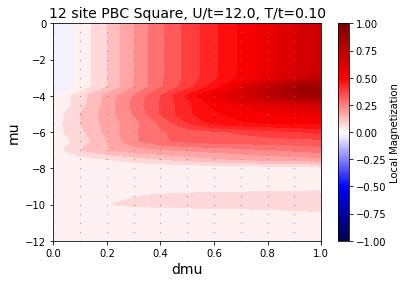

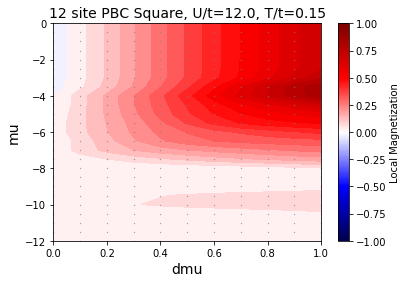

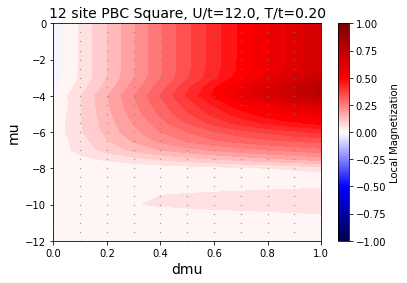

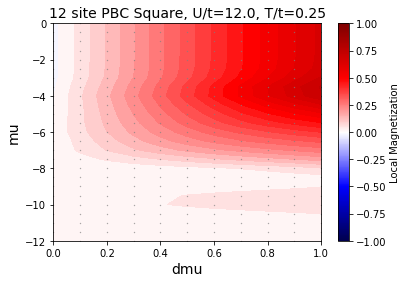

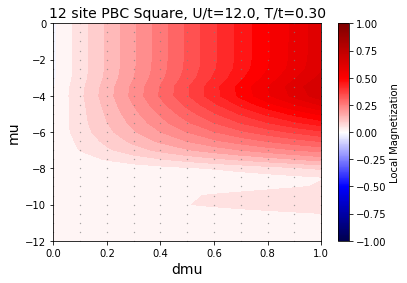

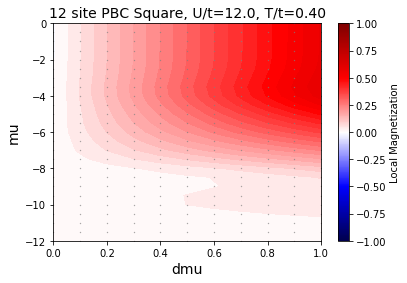

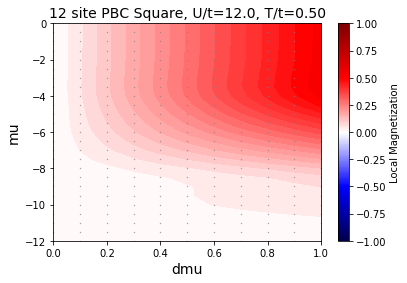

In [74]:
MU, DMU = np.meshgrid(mu_list2, dmu_list, indexing='ij')
cmap = plt.get_cmap('seismic')
myNorm = matplotlib.colors.Normalize(vmin=-1, vmax=1)

for T_i in [1, 2, 3, 4, 5, 7, 9,]:
    T = 1/beta_list[T_i]
    fig, ax =  plt.subplots(facecolor='white')
    plt.title('12 site PBC Square, U/t=%.1f, T/t=%.2f'%(U, 1/beta_list[T_i]), fontsize=14)
    
    temp_list = unumpy.nominal_values((grand_avg_q2[3][:, :,T_i]))
    ax.contourf(DMU, MU, temp_list, cmap=cmap, norm=myNorm, levels=41)
    ax.scatter(DMU, MU, s=0.1,  c='grey')
    
    plt.colorbar(ScalarMappable(myNorm, cmap=cmap), label='Local Magnetization')

    
    ax.set_xlabel('dmu', fontsize=14)
    ax.set_xlim(0,1)
    ax.set_ylabel('mu', fontsize=14)
    plt.ylim(-12, 0)
    # plt.grid()
    plt.show()

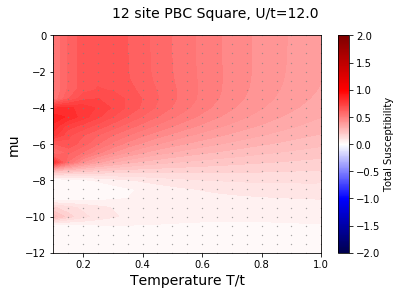

In [76]:

MU, Tlist = np.meshgrid(mu_list2, 1/beta_list, indexing='ij')

cmap = plt.get_cmap('seismic')
myNorm = matplotlib.colors.Normalize(vmin=-2, vmax=2)

fig, ax =  plt.subplots( facecolor='white')
plt.suptitle('12 site PBC Square, U/t=%.1f'%(U), fontsize=14)
temp_list = np.gradient(unumpy.nominal_values((grand_avg_q2[3][:, :, :])), dmu_list, axis=1)[:,len(dmu_list)//2,:]
ax.contourf(Tlist, MU, temp_list, cmap=cmap, norm=myNorm, levels=41)
ax.scatter(Tlist, MU, s=0.1, c='grey')

plt.colorbar(ScalarMappable(myNorm, cmap=cmap), label='Total Susceptibility')

ax.set_xlabel('Temperature T/t', fontsize=14)
ax.set_xlim(0.1,1)
# ax.set_xscale('log')
# ax.set_xticks([0.1, 0.25,  0.5, 1.0],)
# ax.set_xticklabels([0.1, 0.25, 0.5, 1.0])
# ax.set_xticks([], minor=True)
ax.set_ylabel('mu', fontsize=14)
plt.ylim(-12,0)
# plt.grid()
plt.show()